In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r'C:\Users\Diego\Desktop\pyprojects\a medias\titanic\titanictrain.csv')
display(df.sample(5))
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are some NA values we want to take care of

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

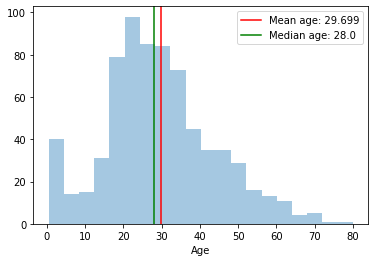

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

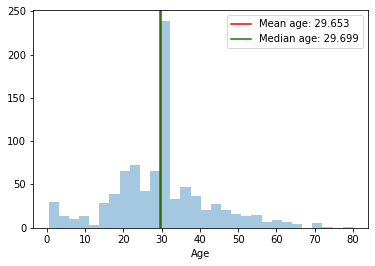

In [10]:
display(df.apply(lambda col:col.isna().sum()))

# not very skewed, we can try to impute missing values with mean in the case of age
mean_age = df['Age'].mean()
median_age = df['Age'].median()
sns.distplot(df['Age'],kde=False)
plt.axvline(mean_age,color='red',label=f'Mean age: {round(mean_age,3)}')
plt.axvline(median_age,color='green',label=f'Median age: {round(median_age,3)}')
plt.legend(loc='upper right')
plt.show()

df['Age'] = df['Age'].fillna(df['Age'].mean())
df.dropna(subset=['Embarked'],inplace=True)

display(df.apply(lambda col:col.isna().sum()))

plt.clf()
mean_age = df['Age'].mean()
median_age = df['Age'].median()
sns.distplot(df['Age'],kde=False)
plt.axvline(mean_age,color='red',label=f'Mean age: {round(mean_age,3)}')
plt.axvline(median_age,color='green',label=f'Median age: {round(median_age,3)}')
plt.legend(loc='upper right')
plt.show()


In [11]:
df.reset_index(inplace=True) # just to avoid problems later (when concatenating dfs)

## Graphical exploraory data analysis

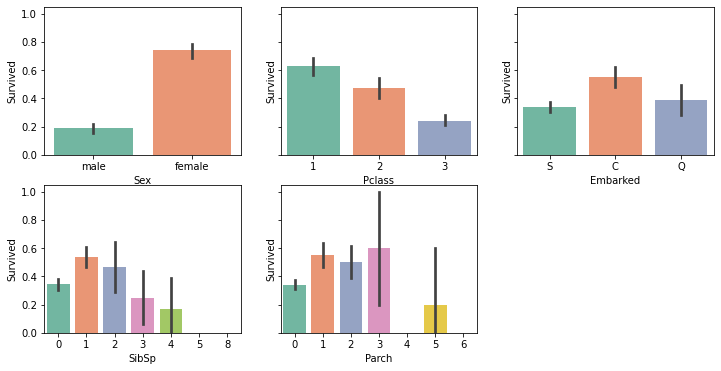

In [12]:
from itertools import product

fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True)
fig.delaxes(axes[1,2])
for ax,feature in zip(product(range(2),range(3)),
                      ['Sex','Pclass','Embarked','SibSp','Parch']):
     sns.barplot(ax=axes[ax],x=feature,y='Survived',palette='Set2',data=df)

In [13]:
for feature in ['Sex','Pclass','Embarked','SibSp','Parch']:
    display(df.groupby(feature).mean()['Survived'])

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

SibSp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Parch
0    0.341716
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

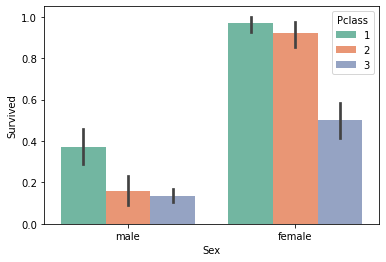

In [14]:
# maybe interaction sex-class
sns.barplot(x='Sex',y='Survived',hue='Pclass',palette='Set2',data=df);

In [15]:
df.groupby(['Sex','Pclass']).mean()['Survived']

Sex     Pclass
female  1         0.967391
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [16]:
df.groupby(['Sex','Pclass','Embarked']).mean()['Survived']

Sex     Pclass  Embarked
female  1       C           0.976744
                Q           1.000000
                S           0.958333
        2       C           1.000000
                Q           1.000000
                S           0.910448
        3       C           0.652174
                Q           0.727273
                S           0.375000
male    1       C           0.404762
                Q           0.000000
                S           0.354430
        2       C           0.200000
                Q           0.000000
                S           0.154639
        3       C           0.232558
                Q           0.076923
                S           0.128302
Name: Survived, dtype: float64

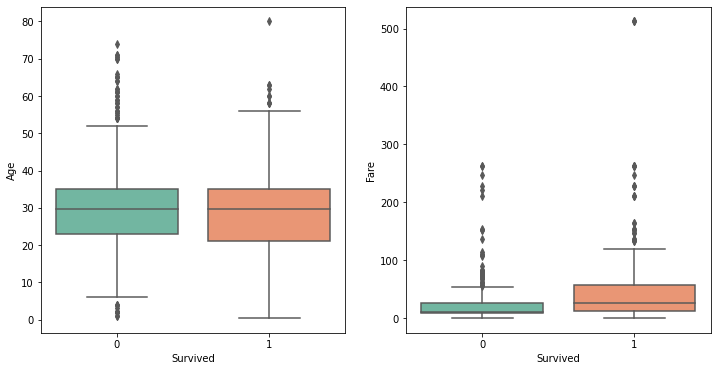

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12, 6), sharex=False)
sns.boxplot(ax=ax1,y='Age',x='Survived',palette='Set2',data=df)
sns.boxplot(ax=ax2,y='Fare',x='Survived',palette='Set2',data=df)

In [18]:
# huge variation in fares -> outliers
df.groupby('Survived').agg(['mean','std'])[['Age','Fare']]

Age                  Fare           
             mean        std       mean        std
Survived                                          
0         30.4151  12.457370  22.117887  31.388207
1         28.4236  13.682862  48.209498  66.748773

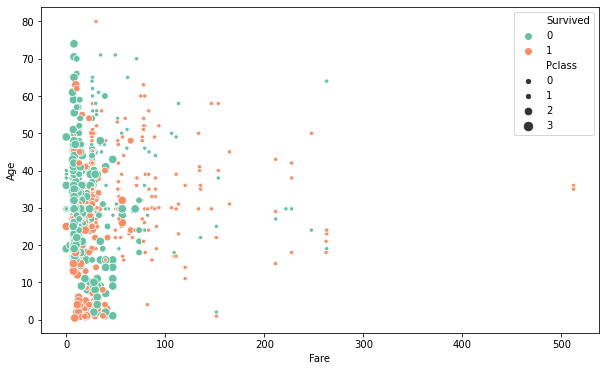

In [19]:
# no inter class-age
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(ax=ax,x='Fare',y='Age',hue='Survived',size='Pclass',palette='Set2',data=df)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [36]:
predictors = ['Age','Fare','Sex','Pclass','Embarked','SibSp','Parch']
dummy = OneHotEncoder(handle_unknown='ignore')
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

logistic = Pipeline([
    ('preprocess_cols',ColumnTransformer([('num_cols',RobustScaler(),['Age','Fare']),
                                          ('cat_cols',dummy,['Sex','Pclass','Embarked','SibSp','Parch'])])
    ),
    ('logistic_model',LogisticRegression(max_iter=1000))
])
cv = GridSearchCV(logistic,                               
            param_grid={'logistic_model__C': np.logspace(-3,3,7)},# [0.001,0.01,0.1,1,10,100,1000]
             cv=10)

cv.fit(df[predictors],df['Survived']);

In [38]:
display(f'best penalty parameter:{cv.best_params_}')
display(f'best score:{round(cv.best_score_,4)}')

"best penalty parameter:{'logistic_model__C': 100.0}"

'best score:0.8032'

In [24]:
cv.best_estimator_.named_steps['logistic_model'].coef_
# cv.best_estimator_.named_steps['logistic_model'].intercept_

classes = ['class '+str(num) for num in sorted(df.Pclass.unique())]
port = ['Port '+port for port in sorted(df.Embarked.unique())]
num_sibsp = [str(num)+' siblings/spouses' for num in sorted(df.SibSp.unique())]
num_parch = [str(num)+' parents/children' for num in sorted(df.Parch.unique())]

# table of coefficients (approx variable importance)
pd.DataFrame(data=cv.best_estimator_.named_steps['logistic_model'].coef_,
            columns=['age','fare','female','male']+classes+port+num_sibsp+num_parch).T.sort_values(by=0,ascending=False)

,0
1 siblings/spouses,1.556513
0 siblings/spouses,1.460606
female,1.333555
2 siblings/spouses,1.168082
1 parents/children,1.099512
class 1,1.012255
3 parents/children,0.949705
2 parents/children,0.759230
0 parents/children,0.730630
Port Q,0.177195


In [218]:
#coefs = pd.DataFrame(data=cv.best_estimator_.named_steps['logistic_model'].coef_,
#            columns=['age','fare','female','male']+classes+port+num_sibsp+num_parch)
# ids = coefs.loc[0].abs().values.argsort()
# coefs.iloc[0,ids]
# dummy.fit_transform(df['Embarked'].values.reshape(-1,1))

In [376]:
knn = Pipeline([
    ('preprocess_cols',ColumnTransformer([('num_cols',RobustScaler(),['Age','Fare']),
                                          ('cat_cols',dummy,['Sex','Pclass','Embarked','SibSp','Parch'])])
    ),
    ('knn_model',KNeighborsClassifier())
])


cv = GridSearchCV(knn,                               
            param_grid={'knn_model__n_neighbors': [k for k in range(1,11)]},# [0.001,0.01,0.1,1,10,100,1000]
             cv=10)
cv.fit(df[predictors],df['Survived'])

display(f'best penalty parameter:{cv.best_params_}')
display(f'best score:{round(cv.best_score_,4)}')

"best penalty parameter:{'knn_model__n_neighbors': 3}"

'best score:0.8043'

In [390]:
from sklearn.ensemble import VotingClassifier

logistic.set_params(logistic_model__C=10)
knn.set_params(knn_model__n_neighbors=3)

clf3 = VotingClassifier(estimators=[('classifier_1',logistic),
                                   ('classifier_2',knn)],
                       voting='soft', # averaging probab values?
                       weights=[0.5,0.5]) # equal importance

clf3.fit(df[predictors],df['Survived']);

In [396]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf3,df[predictors],df['Survived'],cv=10).mean()

0.8177860061287028

That's a simple model, we can do it better

In [289]:
# from exploratory analysis we know there might be some interesting syntethic features

from patsy import dmatrix,dmatrices
inter_term = dmatrix('C(Sex):C(Pclass)-1',data=df[['Sex','Pclass']])
inter_term

DesignMatrix with shape (889, 6)
  Columns:
    ['C(Sex)[female]:C(Pclass)[1]',
     'C(Sex)[male]:C(Pclass)[1]',
     'C(Sex)[female]:C(Pclass)[2]',
     'C(Sex)[male]:C(Pclass)[2]',
     'C(Sex)[female]:C(Pclass)[3]',
     'C(Sex)[male]:C(Pclass)[3]']
  Terms:
    'C(Sex):C(Pclass)' (columns 0:6)
  (to view full data, use np.asarray(this_obj))

In [288]:
inter_names = ['sex*class'+str(a)+str(b) for a,b in product(range(1,3),range(1,4))]
inter_vars = pd.DataFrame(inter_term,
                          columns=inter_names)
df2 = pd.concat([df,inter_vars],axis=1)
#df2.head()

In [286]:
RobustScaler().fit_transform(df[['Age','Fare']])

array([[-0.59223982, -0.31181344],
       [ 0.63852941,  2.45968698],
       [-0.28454751, -0.28259797],
       ...,
       [ 0.        ,  0.38935778],
       [-0.28454751,  0.67285602],
       [ 0.17699095, -0.29017235]])

In [368]:
df[['Age','Fare']] = RobustScaler().fit_transform(df[['Age','Fare']])
y,X = dmatrices('Survived~Age+Fare+C(Sex)*C(Pclass)+C(Embarked)+SibSp+Parch-1',df)
d = pd.DataFrame(X)
X

DesignMatrix with shape (889, 12)
  Columns:
    ['C(Sex)[female]',
     'C(Sex)[male]',
     'C(Pclass)[T.2]',
     'C(Pclass)[T.3]',
     'C(Embarked)[T.Q]',
     'C(Embarked)[T.S]',
     'C(Sex)[T.male]:C(Pclass)[T.2]',
     'C(Sex)[T.male]:C(Pclass)[T.3]',
     'Age',
     'Fare',
     'SibSp',
     'Parch']
  Terms:
    'C(Sex)' (columns 0:2)
    'C(Pclass)' (columns 2:4)
    'C(Embarked)' (columns 4:6)
    'C(Sex):C(Pclass)' (columns 6:8)
    'Age' (column 8)
    'Fare' (column 9)
    'SibSp' (column 10)
    'Parch' (column 11)
  (to view full data, use np.asarray(this_obj))

In [369]:
# pd.get_dummies(df,columns=['Sex','Pclass','Embarked','SibSp','Parch']).drop(columns=['index','PassengerId','Name','Ticket','Cabin'])

In [370]:
cv2 = GridSearchCV(LogisticRegression(max_iter=1000),
                  param_grid={'C': np.logspace(-3,3,7)},# [0.001,0.01,0.1,1,10,100,1000]
                  cv=10)
cv2.fit(np.asarray(X),np.ravel(y))

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [371]:
display(f'best penalty parameter:{cv2.best_params_}')
display(f'best score:{round(cv2.best_score_,4)}')

"best penalty parameter:{'C': 1.0}"

'best score:0.8077'

In [367]:
pd.DataFrame(cv2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007816,0.003212,0.000730,0.001360,0.001,{'C': 0.001},0.617978,0.629213,0.662921,0.719101,0.617978,0.595506,0.629213,0.662921,0.696629,0.625000,0.645646,0.036883,7
1,0.011870,0.003148,0.001271,0.002364,0.01,{'C': 0.01},0.741573,0.741573,0.752809,0.842697,0.786517,0.775281,0.808989,0.741573,0.842697,0.818182,0.785189,0.038890,6
2,0.020390,0.008916,0.001039,0.002483,0.1,{'C': 0.1},0.797753,0.808989,0.764045,0.865169,0.786517,0.764045,0.786517,0.764045,0.853933,0.818182,0.800919,0.034359,3
3,0.029768,0.008930,0.000901,0.002389,1,{'C': 1.0},0.775281,0.797753,0.764045,0.842697,0.797753,0.775281,0.786517,0.775281,0.831461,0.852273,0.799834,0.029770,4
4,0.039351,0.007831,0.000103,0.000309,10,{'C': 10.0},0.775281,0.797753,0.764045,0.808989,0.797753,0.775281,0.786517,0.797753,0.831461,0.852273,0.798710,0.025491,5
5,0.024785,0.010861,0.000000,0.000000,100,{'C': 100.0},0.786517,0.797753,0.764045,0.820225,0.797753,0.775281,0.786517,0.797753,0.831461,0.852273,0.800958,0.025307,1
6,0.026450,0.007008,0.000000,0.000000,1000,{'C': 1000.0},0.786517,0.797753,0.764045,0.820225,0.797753,0.775281,0.786517,0.797753,0.831461,0.852273,0.800958,0.025307,1
